# Huiswerkopgave - Old or Not

### Notebook by `Esmee Kraan, s1173469`

#### Gemaakt met behulp van chatGPT
---

## Table of contents

1. [Introduction](#Introduction)

2. [The problem domain](#The-problem-domain)

3. [Business Understanding](#Business-Understanding)

4. [Required libraries](#Required-libraries)

5. [Data Understanding](#Data-Understanding)

6. [Data Prepartion](#Data-Preparation)

7. [Modeling](#Modeling)

8. [Evaluation](#Evaluation)

9. [Reproducibility](#Reproducibility)

10. [Reference](#Reference)
---

# Introduction

[[ go back to the top ]](#Table-of-contents)

In deze notebook gaan we een neuraal netwerk bouwen dat kan bepalen of een beroemdheid jonger of ouder is dan 42 jaar. Het doel is om een model te trainen dat gezichten kan classificeren als 'not old' (tussen 21 en 42 jaar) of 'old' (ouder dan 42 jaar). We maken gebruik van de IMDB Faces Dataset, die meer dan 460.000 afbeeldingen bevat van beroemdheden met informatie over leeftijd en geslacht.

---

# The problem domain

[[ go back to the top ]](#Table-of-contents)

Dit project draait om leeftijdsclassificatie met behulp van gezichtsafbeeldingen van beroemdheden. Het bepalen van de leeftijd van volwassen beroemdheden op basis van hun uiterlijk kan lastig zijn voor mensen. We willen onderzoeken of een neuraal netwerk beter in staat is om te bepalen of iemand ouder is dan 42 jaar. 

We maken gebruik van de IMDB-WIKI dataset, één van de grootste publieke datasets met gezichtsafbeeldingen en leeftijdsinformatie. Deze dataset bevat gezichten van beroemdheden afkomstig van IMDB, inclusief metadata zoals leeftijd en geslacht. Voor dit project gebruiken we alleen de gegevens van volwassenen (21 jaar of ouder) en filteren we foto's waar meerdere gezichten of geen gezicht op staan.

De uitdaging in dit domein ligt niet alleen in de nauwkeurige classificatie van leeftijd, maar ook in het correct verwerken en filteren van de dataset. Door gebruik te maken van slechts 50.000 voorbeelden, willen we een model bouwen dat niet alleen goed presteert op de trainingsdata, maar ook goed generaliseert naar nieuwe, ongeziene afbeeldingen.

---

## Business Understanding: 
Van volwassen beroemdheden is het vaak lastig te zeggen hoe oud ze zijn. Nu gaan we kijken of we een neuraal netwerk kunnen bouwen wat dit beter kan schatten dan wij. We nemens als grens de compleet arbitraire waarde van 42 jaar. Iedereen tussen de 21 en 42 noemen we 'not old' en iedereen boven deze grens definieren we als 'old' 

We gebruiken hiervoor de IMDB faces database met daarin meer dan 460.000 gezichten van een dikke 20.000 beroemdheden afkomstig van IMDB (zie https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/ voor uitleg en details) en hierbij de IMDB informatie over o.a. leeftijd en geslacht. We downloaden hier de de cropped IMDB dataset (https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar). De metadata wordt in .mat (matlab) bestand meegeleverd. 

- We beperken ons tot volwassen beroemdheden. <u>Iedereen onder de 21 jaar mag je overslaan.</u>
- Er zitten nogal wat foto's met meerdere gezichten of geen gezicht op. <u>Deze mag je eruit filteren</u>
- We verwachten niet alleen de code maar (in het notebook) ook een <u>uitleg</u> van waarom je dingen hebt gedaan. 
- I.v.m. performance issues gebruiken we na opschoning alleen de <u>1e 50.000</u> records als data
- Gebruik <u>20% van je data als testset, gebruik 42 als random state</u>
- Eindig met de mogelijkheid om een jpg van bijv. jezelf in te lezen en d.m.v. het getrainde netwerk te bepalen of diegene wel of niet oud is.

Vul je antwoorden steeds op de juiste plaats in. Maak indien nodig extra cellen aan.

# Required Libraries - WIP

[[ go back to the top ]](#Table-of-contents)

Voor dit project maken we gebruik van verschillende Python-pakketten die nodig zijn om de data te analyseren, te modelleren en te visualiseren. Als je deze nog niet hebt geïnstalleerd, kun je ze gemakkelijk installeren via `conda` of `pip`.

De primaire bibliotheken die we gebruiken zijn:

- **pandas:** Voor het opslaan en manipuleren van data in DataFrames.
- **NumPy:** Ondersteunt numerieke arrays en wiskundige operaties.
- **TensorFlow en Keras:** Gebruikt voor het bouwen en trainen van neurale netwerken.
- **Matplotlib:** Een bibliotheek voor het visualiseren van data door middel van grafieken.
- **Seaborn:** Een statistische datavisualisatiebibliotheek die gebruik maakt van Matplotlib.
- **OpenCV (cv2):** Gebruikt voor beeldverwerking, zoals het inladen en aanpassen van afbeeldingen.
- **Scikit-learn:** Een bibliotheek met tools voor machine learning en data-analyse, gebruikt voor train-test splits en evaluatie.
- **Scipy:** Voor wiskundige en wetenschappelijke berekeningen.
- **datetime en dateutil.relativedelta:** Gebruikt voor het manipuleren van datums en tijdsintervallen.
- **IPython.display (Markdown):** Voor het dynamisch weergeven van Markdown-inhoud in Jupyter Notebooks.

Om ervoor te zorgen dat alle benodigde bibliotheken zijn geïnstalleerd, kun je de volgende commando's gebruiken:

```bash
conda install pandas numpy matplotlib seaborn scipy scikit-learn opencv-python
pip install pandas numpy matplotlib seaborn scipy scikit-learn opencv-python tensorflow keras
```

In [579]:
# TensorFlow en Keras - Gebruikt voor het bouwen en trainen van neurale netwerken
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers

# Data manipulatie en numerieke operaties
import pandas as pd  # Voor het werken met DataFrames
import numpy as np   # Voor numerieke bewerkingen en array-manipulaties

# Visualisatiebibliotheken
import matplotlib.pyplot as plt  # Basisplotten van grafieken
import seaborn as sns  # Geavanceerdere statistische grafieken op basis van Matplotlib

# Beeldverwerking
import cv2  # OpenCV voor het inladen en bewerken van afbeeldingen

# Wetenschappelijke en wiskundige operaties
import scipy.io  # Voor het laden van .mat-bestanden en andere wiskundige functies

# Bestands- en mappenbeheer
import os  # Voor het werken met bestands- en padnamen

# Machine learning functionaliteiten
from sklearn.model_selection import train_test_split  # Voor het splitsen van datasets in train- en testgroepen
from sklearn.metrics import confusion_matrix  # Voor het berekenen en evalueren van classificatieprestaties

# Datums en tijd gerelateerde functies
import datetime as date  # Voor datum- en tijdbewerkingen
from dateutil.relativedelta import relativedelta  # Voor het manipuleren van datums op basis van relatieve tijdseenheden

# Data Understanding

[[ go back to the top ]](#Table-of-contents)

Voor zowel de IMDb- als Wikipedia-afbeeldingen wordt een apart `.mat`-bestand geleverd, dat kan worden geladen met Matlab en alle metadata bevat. Hieronder volgt een toelichting van de belangrijkste variabelen:

- **dob**: Dit staat voor de geboortedatum van de beroemdheid, opgeslagen als een Matlab-serieel datumgetal.
- **photo_taken**: Het jaar waarin de foto is genomen.
- **full_path**: Het pad naar de afbeeldingsbestanden.
- **gender**: Het geslacht van de beroemdheid, waarbij 0 voor vrouw en 1 voor man staat. Als het geslacht onbekend is, wordt deze waarde als `NaN` weergegeven.
- **name**: De naam van de beroemdheid.
- **face_location**: De locatie van het gezicht in de afbeelding. 
- **face_score:** Een score die aangeeft hoe goed de gezichtsdetector het gezicht heeft gedetecteerd; hoe hoger, hoe beter. Als de score Inf is, betekent dit dat er geen gezicht in de afbeelding is gevonden en geeft de face_location de gehele afbeelding terug.
- **second_face_score:** De score van een tweede gedetecteerd gezicht (indien aanwezig). Dit is nuttig om afbeeldingen met meerdere gezichten te negeren. Als er geen tweede gezicht is gevonden, is deze waarde NaN.
- **celeb_names (alleen IMDB):** Een lijst met de namen van alle beroemdheden in de dataset.
- **celeb_id (alleen IMDB):** Een index die verwijst naar de naam van een beroemdheid in de lijst met namen.

bron: https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/ onder het kopje <u> Usage </u>

In [580]:
#Lees de metadata in, bestudeer deze en maak voor iedere relevante variabele een aparte list aan
# Laad het .mat bestand met metadata
mat = scipy.io.loadmat('../../bijlagen/imdb_crop/imdb.mat')
print(mat.keys())  # Bekijk de sleutels in het bestand

dict_keys(['__header__', '__version__', '__globals__', 'imdb'])


Ik heb wat onderzoek gedaan wat deze keys betekenen en kwam op de volgende uitkomsten:
* __header__, __version__, __globals__: Deze komen vaak voor in .mat-bestanden en bevatten metadata over het bestand zelf (zoals versies en headers), wat meestal niet direct relevant is voor de analyse.
* `imdb:` Dit is de belangrijkste sleutel. Het bevat de daadwerkelijke dataset waar we mee gaan werken. We gebruiken deze variabele om toegang te krijgen tot de gegevens.

In [581]:
# Verkrijg en verken de 'imdb' data
imdb_data = mat['imdb']
print(imdb_data.dtype)  # Bekijk de structuur van de 'imdb' data

[('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('face_score', 'O'), ('second_face_score', 'O'), ('celeb_names', 'O'), ('celeb_id', 'O')]


Hier kijkt ik nogmaals welke soort data er in zit, maar ik wist niet waar 'O' voor stond. Dus heb ik dat opgezocht:
* (`O`, wat voor object staat, vaak arrays of lijsten).
De betekenis achter elke variabele staat in de [Data Understanding](#Data-Understanding)

In [582]:
# Verkrijg gegevens en zet deze om
imdb_dob = imdb_data[0][0][0][0]
imdb_photo_taken = imdb_data[0][0][1][0]
imdb_full_path = imdb_data[0][0][2][0]
imdb_gender = imdb_data[0][0][3][0]
imdb_face_score1 = imdb_data[0][0][6][0]
imdb_face_score2 = imdb_data[0][0][7][0]

# Bekijk de eerste paar waarden
print(imdb_dob[:5])
print(imdb_photo_taken[:5])
print(imdb_full_path[:5])
print(imdb_gender[:5])
print(imdb_face_score1[:5])
print(imdb_face_score2[:5])

[693726 693726 693726 693726 693726]
[1968 1970 1968 1968 1968]
[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43')
 array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44')
 array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43')
 array(['01/nm0000001_rm946909184_1899-5-10_1968.jpg'], dtype='<U43')
 array(['01/nm0000001_rm980463616_1899-5-10_1968.jpg'], dtype='<U43')]
[1. 1. 1. 1. 1.]
[1.45969291 2.5431976  3.45557949 1.87211717 1.15876579]
[1.11897336 1.85200773 2.98566022        nan        nan]


Wat me gelijk opvalt is hoe de geboortedatums zijn opgeslagen, op de website stond vermeld dat dit als 'Matlab-serieel datumgetal' is. Ook viel het me op dat er een `nan` waarde zat in imdb_face_score2. Maar dit kan kloppen want in de DU staat het volgende:

"*De score van een tweede gedetecteerd gezicht (indien aanwezig). Dit is nuttig om afbeeldingen met meerdere gezichten te negeren. <u> Als er geen tweede gezicht is gevonden, is deze waarde NaN.</u>*"

In [583]:
# Inspecteer de vorm van enkele arrays
print("Shape of face_score:", imdb_face_score1.shape)
print("Shape of second_face_score:", imdb_face_score2.shape)
print("Shape of dob:", imdb_dob.shape)
print("Shape of photo_taken:", imdb_photo_taken.shape)
print("Shape of full_path:", imdb_full_path.shape)
print("Shape of gender:", imdb_gender.shape)

Shape of face_score: (460723,)
Shape of second_face_score: (460723,)
Shape of dob: (460723,)
Shape of photo_taken: (460723,)
Shape of full_path: (460723,)
Shape of gender: (460723,)


De shape van alle array is hetzelfde, zo weet ik dat dit niet voor problemen gaat zorgen bij het maken van een dataframe.

## Data preparation: 
Omdat we de leeftijd van de personen moeten omrekenen converteer ik de geboortedatums die zijn opgeslagen in Matlab's serial date nummer formaat naar Python's `datetime` objecten om ze leesbaar en bruikbaar te maken. Matlab serial date nummers zijn niet direct bruikbaar in Python. `matlab_datenum_to_date` zorgt ervoor dat we de datums omzetten naar een formaat dat we kunnen manipuleren en gebruiken in verdere analyses.


Daarna bereken ik de leeftijd van een persoon op basis van hun geboortedatum en het jaar waarin de foto is genomen met de functie `calculate_age`. Door de leeftijd te berekenen, kunnen we inzichten verkrijgen over de leeftijdsdistributie van de personen in de dataset.

Ook verwijder ik ongeldige leeftijdswaarden die ontstaan door foutieve of ontbrekende datums. Omdat negatieve leeftijden duiden op fouten in de gegevensverwerking. Het verwijderen van deze waarden zorgt ervoor dat de uiteindelijke dataset schoon en bruikbaar is voor verdere analyse en visualisatie.

In [584]:
# Omzetten van dob (geboortedatums) naar datetime objecten
def matlab_datenum_to_date(matlab_datenum):
    try:
        if matlab_datenum > 0:
            return date.datetime.fromordinal(int(matlab_datenum)) + date.timedelta(days=int(matlab_datenum) % 1) - date.timedelta(days=366)
        else:
            return None
    except OverflowError:
        return None

# Functie om de leeftijd te berekenen
def calculate_age(dob, photo_year):
    try:
        if dob is None or isinstance(dob, date.datetime) is False:
            return -1

        return photo_year - dob.year
    except Exception as e:
        print(f"Fout bij het berekenen van de leeftijd: {e}")
        return -1

# Converteer de geboortedatums naar datetime objecten
dob_converted = np.array([matlab_datenum_to_date(d) if not np.isnan(d) else None for d in imdb_dob.flatten()])

# Haal het jaar van de foto op
photo_year = imdb_photo_taken.flatten()

# Bereken de leeftijden, waarbij ongeldige datums en onbekende leeftijden worden afgehandeld
ages = np.array([calculate_age(d, y) for d, y in zip(dob_converted, photo_year)])

# Verwijder negatieve leeftijden (indien nodig)
ages = ages[ages != -1]

# print("Voorbeelden van ages:", ages[:10]) # Debug informatie: kijk naar enkele waarden van ages
# print(f"Grootte van de ages array: {ages.size}") # Debug: controleer de grootte van de ages array

#### Leeftijden filteren.
Ik verwijder alle leeftijden onder de 21 jaar omdat de opdracht was om ons te beperken tot volwassen beroemdheden. Ook filter ik onrealistische leeftijden eruit, sinds er 99 mapjes zijn ben ik ervanuit gegaan dat 100 de oudste leeftijd is en heb ik deze daarom als punt gebruikt.

In [585]:
# Filter de leeftijden om alleen waarden van 21 jaar en ouder te behouden
filtered_ages = ages[ages >= 21]

# Verwijder onrealistische leeftijden (bijv. boven 100 jaar)
filtered_ages = filtered_ages [filtered_ages  <= 100]

Minimale leeftijd: 21
Maximale leeftijd: 100
Gemiddelde leeftijd: 38.68495178998512
Standaardafwijking: 12.059670873455998


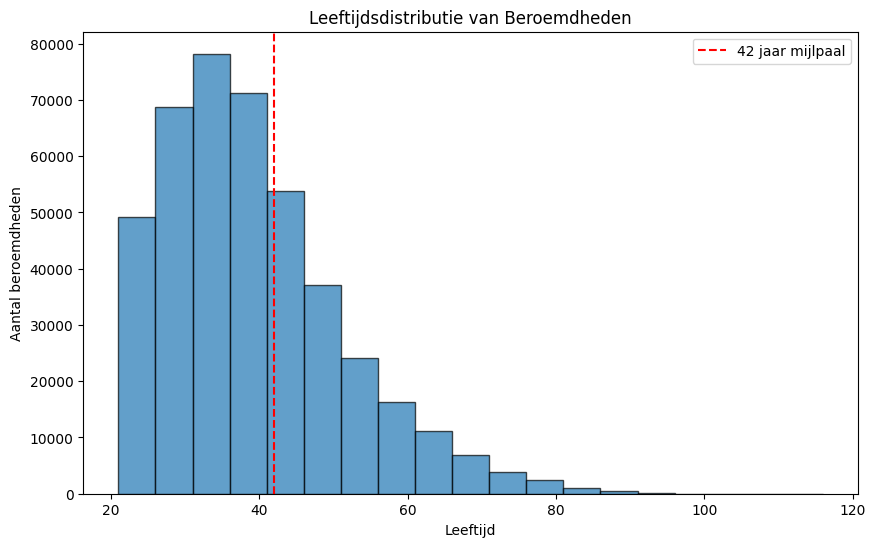

In [586]:
# Controleer de statistieken van de gefilterde leeftijden
print(f"Minimale leeftijd: {filtered_ages.min()}")
print(f"Maximale leeftijd: {filtered_ages.max()}")
print(f"Gemiddelde leeftijd: {filtered_ages.mean()}")
print(f"Standaardafwijking: {filtered_ages.std()}")

# Plot de histogram van de leeftijden
plt.figure(figsize=(10, 6))
plt.hist(filtered_ages, bins=range(21, 121, 5), edgecolor='black', alpha=0.7)

# Voeg een verticale lijn toe op 42
plt.axvline(x=42, color='red', linestyle='--', label='42 jaar mijlpaal')

# Voeg labels en titel toe
plt.xlabel('Leeftijd')
plt.ylabel('Aantal beroemdheden')
plt.title('Leeftijdsdistributie van Beroemdheden')
plt.legend()

# Toon de plot
plt.show()

Percentage onder 42 jaar: 65.70%
Percentage 42 jaar en ouder: 34.30%


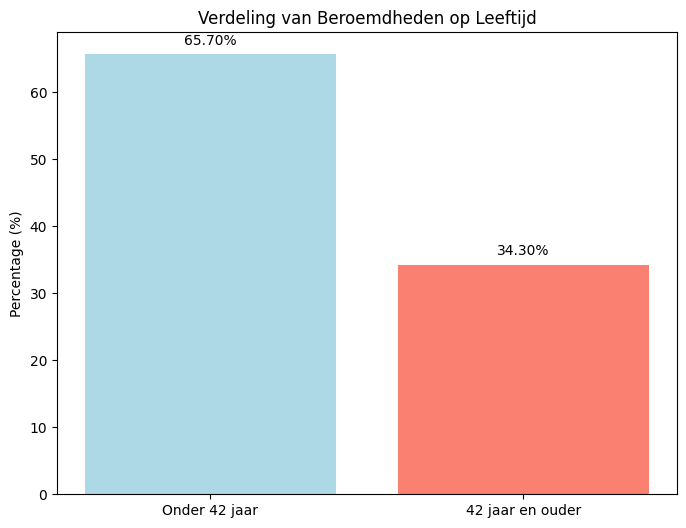

In [587]:
# Bereken percentages onder en boven 42 jaar
below_42 = np.sum(filtered_ages < 42)
above_42 = np.sum(filtered_ages >= 42)

total_count = len(filtered_ages)

percentage_below_42 = (below_42 / total_count) * 100
percentage_above_42 = (above_42 / total_count) * 100

# Print de percentages
print(f"Percentage onder 42 jaar: {percentage_below_42:.2f}%")
print(f"Percentage 42 jaar en ouder: {percentage_above_42:.2f}%")

# Visualiseer de verdeling met een staafdiagram
plt.figure(figsize=(8, 6))
categories = ['Onder 42 jaar', '42 jaar en ouder']
percentages = [percentage_below_42, percentage_above_42]

plt.bar(categories, percentages, color=['lightblue', 'salmon'])
plt.ylabel('Percentage (%)')
plt.title('Verdeling van Beroemdheden op Leeftijd')

# Voeg de percentages toe boven de staven
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom') # type: ignore

plt.show()

Op basis van de dataset heb ik de volgende bevindingen:

- **Minimale leeftijd:** 21 jaar
- **Maximale leeftijd:** 100 jaar
- **Gemiddelde leeftijd:** Ongeveer 38.7 jaar
- **Standaardafwijking:** Ongeveer 12.1 jaar

Van de beroemdheden in de dataset:

- 65.70% is jonger dan 42 jaar.
- 34.30% is 42 jaar of ouder.

Deze verdeling geeft een goed overzicht van de leeftijdsopbouw van de beroemdheden in onze dataset, met een meerderheid die jonger is dan 42 jaar. Om de dataset evenwichtig te verdelen hou ik hier rekening mee dat ik de verdeling zelf nog moet aanpassen naar 50/50.

## Data Preprocessing

In [588]:
# Inspecteer de structuur van de imdb_data
for key in imdb_data.dtype.names:
    print(f"Key: {key}, Shape: {imdb_data[key].shape}, Type: {type(imdb_data[key])}")

Key: dob, Shape: (1, 1), Type: <class 'numpy.ndarray'>
Key: photo_taken, Shape: (1, 1), Type: <class 'numpy.ndarray'>
Key: full_path, Shape: (1, 1), Type: <class 'numpy.ndarray'>
Key: gender, Shape: (1, 1), Type: <class 'numpy.ndarray'>
Key: name, Shape: (1, 1), Type: <class 'numpy.ndarray'>
Key: face_location, Shape: (1, 1), Type: <class 'numpy.ndarray'>
Key: face_score, Shape: (1, 1), Type: <class 'numpy.ndarray'>
Key: second_face_score, Shape: (1, 1), Type: <class 'numpy.ndarray'>
Key: celeb_names, Shape: (1, 1), Type: <class 'numpy.ndarray'>
Key: celeb_id, Shape: (1, 1), Type: <class 'numpy.ndarray'>


Deze filter code komt van deze [GitHub](https://github.com/imdeepmind/processed-imdb-wiki-dataset).

In [589]:
# Verwerk paden en geslachten
imdb_path = ['imdb_crop/' + path[0] for path in imdb_full_path]
imdb_genders = ['male' if gender == 1 else 'female' for gender in imdb_gender]

Hier worden de paden naar de afbeeldingen en de geslachten van de personen verwerkt.

**Paden verwerken:**
'imdb_crop/' wordt toegevoegd aan het begin van elk pad in de variabele imdb_full_path. Waarschijnlijk is dit om ervoor te zorgen dat je het juiste basisbestandspad hebt voor alle afbeeldingen.

**Geslacht verwerken:**
Hier worden de numerieke waarden van geslacht geconverteert (   1 voor mannelijk en 0 voor vrouwelijk) naar stringwaarden 'male' en 'female', afhankelijk van de waarde in imdb_gender.

In [590]:
# Verwerk geboortedatums
imdb_dob = []
for file in imdb_path:
    temp = file.split('_')[3]
    temp = temp.split('-')
    temp[1] = temp[1].zfill(2)  # Voeg een voorloopnul toe
    temp[2] = temp[2].zfill(2)  # Voeg een voorloopnul toe

    # Zorg ervoor dat de maand en dag niet op '00' staan
    temp[1] = '01' if temp[1] == '00' else temp[1]
    temp[2] = '01' if temp[2] == '00' else temp[2]

    imdb_dob.append('-'.join(temp))

Hier worden de geboortedatums uit de bestandsnamen van de afbeeldingen verwerkt.

**Bestandsnaam parsing:**
De geboortedatum wordt uit de bestandsnaam gehaald door deze te splitsen. De vierde component (file.split('_')[3]), die de geboortedatum in de vorm YYYY-MM-DD bevat, wordt gebruikt.

**Voeg voorloopnullen toe:**
Voor de maand en dag worden voorloopnullen toegevoegd met behulp van zfill(2), zodat waarden zoals "1" worden omgezet naar "01".

**Invaliditeiten corrigeren:**
Indien de maand of dag "00" is, wordt deze omgezet naar "01". Omdat 00 niet een geldige maand of dag is (01 is Januari)

**Geformatteerde datum opslaan:**
Uiteindelijk worden de afzonderlijke delen (jaar, maand, dag) samengevoegd in de vorm "YYYY-MM-DD" en aan imdb_dob toegevoegd.

In [591]:
# Bereken leeftijden
imdb_age = []
for i in range(len(imdb_dob)):
    try:
        d1 = date.datetime.strptime(imdb_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(imdb_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        print(ex)
        diff = -1
    imdb_age.append(diff)

time data '0-12-22' does not match format '%Y-%m-%d'
time data '0-05-21' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-

De leeftijd van een persoon wordt berekend op basis van de geboortedatum (imdb_dob) en het jaar waarin de foto is genomen (imdb_photo_taken).

**Datetime conversie:**
De geboortedatum (imdb_dob) wordt omgezet naar een datetime object (d1), en hetzelfde gebeurt voor het jaar waarin de foto is genomen (d2).

**Leeftijd berekenen:**
Door gebruik te maken van de relativedelta van de dateutil-bibliotheek, wordt het verschil in jaren tussen deze twee datums berekend. Dit verschil vertegenwoordigt de leeftijd van de persoon op het moment dat de foto is genomen.

Sinds alle gegevens nu verwerkt zijn en allemaal dezelfde shape hebben kan er een DataFrame gemaakt worden.

In [592]:
# Maak een DataFrame met de verwerkte gegevens
final_imdb = np.vstack((imdb_age, imdb_genders, imdb_path, imdb_face_score1, imdb_face_score2)).T
final_imdb_df = pd.DataFrame(final_imdb, columns=['age', 'gender', 'path', 'face_score1', 'face_score2'])

Er zijn nog een paar filteringen die uitgevoerd moesten worden zoals foto's met meer dan 1 foto moest eruit. 

**Filtering op face_score1:** De rijwaarden waarbij face_score1 gelijk is aan '-inf' worden verwijderd. Dit kan gedaan worden om ongeldige of irrelevante gegevens uit te sluiten.

**Filtering op face_score2:** De rijen waar face_score2 gelijk is aan 'nan' worden behouden. Dit betekent dat alleen rijen met een niet-numerieke waarde of 'NaN' in face_score2 in de DataFrame blijven.

**Shuffle en reset index:** De rijen in de DataFrame worden door elkaar geschud (sample(frac=1)) en de index wordt opnieuw ingesteld zonder de oude index toe te voegen als een kolom (reset_index(drop=True)). Dit zorgt voor een willekeurige volgorde van de gegevens.

Omdat we face_score1 en 2 later niet meer gaan gebruiken droppen we deze ook gelijk.

Tot slot wordt de opgeschoonde DataFrame opgeslagen als een CSV-bestand genaamd `meta.csv`. Dit maakt het mogelijk om de gegevens later opnieuw te gebruiken of te delen.

In [595]:
# Opschonen van de DataFrame
meta = final_imdb_df
meta = meta[meta['face_score1'] != '-inf']
meta = meta[meta['face_score2'] == 'nan']
meta = meta.drop(['face_score1', 'face_score2'], axis=1)
meta = meta.sample(frac=1).reset_index(drop=True)

# Opslaan in een CSV bestand
meta.to_csv('meta.csv', index=False)

In [596]:
# Lees de opgeslagen metadata CSV in
meta = pd.read_csv('../../bijlagen/imdb_crop/meta.csv')

In [597]:
# Selecteer gegevens op basis van leeftijd
old = meta[meta["age"].between(43, 101)].iloc[:25000]
not_old = meta[meta["age"].between(21, 42)].iloc[:25000]
meta = pd.concat([old, not_old])

# Verwijder de geslachtskolom en voeg 'old_or_not' kolom toe
meta = meta.drop(['gender'], axis=1)
meta['old_or_not'] = (meta['age'] > 42).astype(int)

Ik filter hier de dataset op basis van leeftijd en hoeveel gedecterde gezichten er zijn op de foto.

- **Minimale Leeftijd**: Beperk de dataset tot personen die 21 jaar of ouder zijn.
- **Maximale Leeftijd**: Beperk de dataset tot personen die 122 jaar of jonger zijn.

- **Gender kolom**: Ik drop de gender kolom omdat ik de foto's alleen ga voorspellen aan de hand van de leeftijd. Als ik meer tijd had gehad had ik gender graag meegenomen in de voorspelling.

De gefilterde DataFrame bevat nu alleen afbeeldingen met realistische leeftijden en met één goed gedetecteerd gezicht.

Omdat er weer filters zijn toegevoegd en andere dingen zijn gedaan aan de dataset is de index een beetje in de war. Soms springt hij van 1 naar 4 naar 7 naar 10. Daarom ga ik de index nogmaals resetten.

In [598]:
# Index resetten want veel data is weggevallen door het opschonen
meta = meta.reset_index()
meta = meta.drop(['index'], axis=1)

Om te kijken of de index en de gegevens er goed uitzien bekijk ik nog één keer de .head() en vergelijk ik de shape tussen de ongefilterde dataset `final_imdb_df` en `meta`. Als alles goed is gegaan komt hier (460723, 3) en (50000, 3) uit.

In [599]:
# Controleer de eerste paar rijen
print(meta.head())

   age                                               path  old_or_not
0   79  imdb_crop/95/nm0000095_rm1036514304_1935-12-1_...           1
1   47  imdb_crop/75/nm0000675_rm2712712192_1963-6-10_...           1
2   44  imdb_crop/52/nm0236952_rm1116838144_1950-2-21_...           1
3   70  imdb_crop/37/nm0001137_rm874024192_1939-9-5_20...           1
4   49  imdb_crop/30/nm0675730_rm2261841920_1964-6-4_2...           1


In [600]:
print(final_imdb_df.shape)
print(meta.shape)

(460723, 5)
(50000, 3)


Na het filteren en de dataset verminderen tot 25000 jonge mensen en 25000 oude mensen is de dataframe van 460723 naar 50000 gegaan. Als alles goed is geaan krijg ik de volgende train- en testset:

- Trainset: (40000, 3)
- Testset: (10000, 3)

In [601]:
# Splits de gefilterde dataset in train- en testset
# 20% van de data wordt gebruikt als testset
# random_state=42 zorgt voor reproduceerbare splits
df_train, df_test = train_test_split(meta, test_size=0.2, random_state=42)

# Converteer naar een array
df_train, df_test = df_train.values, df_test.values

# Print de vormen van de train- en testsets
print("Trainset vorm:", df_train.shape)
print("Testset vorm:", df_test.shape)

Trainset vorm: (40000, 3)
Testset vorm: (10000, 3)


### Afbeeldingsverwerking

Ik liep veel tegen dit punt aan, de afbeeldingen verwerken en opslaan voor de train- en test dataset. Daarom heb ik tijdens de les hulp gevraagd van Raymond, zo hebben we samen mijn code herschreven met behulp van deze openbare [GitHub](https://github.com/imdeepmind/processed-imdb-wiki-dataset).

In [602]:
# Maak de directorystructuur aan
for i in range(102):
    # Training directories
    os.makedirs(f'../../bijlagen/imdb_crop/train/{i}', exist_ok=True)
    # Testing directories
    os.makedirs(f'../../bijlagen/imdb_crop/test/{i}', exist_ok=True)

In [603]:
# Verwerk en sla de trainingsafbeeldingen op
counter_train = 0
for image in df_train:
    file_path = os.path.join('../../bijlagen/', image[1])  # Combineer basispad met relatieve pad
    age = int(image[0])  # De leeftijd

    try:
        img = cv2.imread(file_path, 1)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Zorgt ervoor dat alle foto's niet blauw zijn.
            img = cv2.resize(img, (64, 64))
            # Opslaan in de juiste map op basis van leeftijd
            output_path = os.path.join('../../bijlagen/imdb_crop/train/', str(age), f'{counter_train}_{str(image[2])}.jpg')
            cv2.imwrite(output_path, img)
            #print(f'--({counter_train}) Processing Training Image--')
            counter_train += 1
        else:
            print(f"Warning: Image at path {file_path} could not be read.")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Verwerk en sla de testafbeeldingen op
counter_test = 0
for image in df_test:
    file_path = os.path.join('../../bijlagen/', image[1])  # Combineer basispad met relatieve pad
    age = int(image[0])  # De leeftijd

    try:
        img = cv2.imread(file_path, 1)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Zorgt ervoor dat alle foto's niet blauw zijn.
            img = cv2.resize(img, (64, 64))
            # Opslaan in de juiste map op basis van leeftijd
            output_path = os.path.join('../../bijlagen/imdb_crop/test/', str(age), f'{counter_test}_{str(image[2])}.jpg')
            cv2.imwrite(output_path, img)
            #print(f'--({counter_test}) Processing Test Image--')
            counter_test += 1
        else:
            print(f"Warning: Image at path {file_path} could not be read.")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

Deze code voert de volgende taken uit:

### Kernpunten
- **Mappen Aanmaken**: Er worden mappen gemaakt voor elke leeftijd (0-101), zowel voor `train` als `test`.
- **Afbeeldingen Verwerken**: Afbeeldingen worden gelezen en (hieronder) geschaald naar 64x64 pixels.
- **Bestanden Opslaan**: Afbeeldingen worden opgeslagen in leeftijdspecifieke mappen met unieke bestandsnamen.

Op dezelfde github stond ook code om de afbeeldingen en labels te laden, deze heb ik dan ook van dezelfde [GitHub](https://github.com/imdeepmind/processed-imdb-wiki-dataset) over genomen.

In [604]:
# Definieer de afbeeldingsgrootte
img_size = (64, 64)

# Functie om afbeeldingen en labels te laden uit een map
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            try:
                # Haal het label uit de bestandsnaam
                label = int(filename.split('_')[1].split('.')[0])
                # Lees en wijzig de grootte van de afbeelding
                img_path = os.path.join(folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Warning: Unable to read image {img_path}")
            except Exception as e:
                print(f"Error processing file {filename}: {e}")
    return np.array(images), np.array(labels)

# Paden naar de trainings- en testmappen
train_dir = '../../bijlagen/imdb_crop/train'
test_dir = '../../bijlagen/imdb_crop/test'

# Initialiseer lijsten voor train- en testdata
train_images = []
train_labels = []
test_images = []
test_labels = []

# Laad de trainingsafbeeldingen en labels
for age_group in range(102):
    age_group_dir = os.path.join(train_dir, str(age_group))
    if os.path.exists(age_group_dir):
        images, labels = load_images_from_folder(age_group_dir)
        if len(images) > 0:
            train_images.append(images)
            train_labels.append(labels)
    else:
        print(f"Warning: Directory {age_group_dir} does not exist.")

# Lijsten samenvoegen tot single arrays
if len(train_images) > 0:
    train_images = np.concatenate(train_images, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)

# Laad de testafbeeldingen en labels
for age_group in range(102):
    age_group_dir = os.path.join(test_dir, str(age_group))
    if os.path.exists(age_group_dir):
        images, labels = load_images_from_folder(age_group_dir)
        if len(images) > 0:
            test_images.append(images)
            test_labels.append(labels)
    else:
        print(f"Warning: Directory {age_group_dir} does not exist.")

# Lijsten samenvoegen tot enkele arrays
if len(test_images) > 0:
    test_images = np.concatenate(test_images, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

# Vorm van de arrays controleren
print(f'Train images shape: {train_images.shape}') # type: ignore
print(f'Train labels shape: {train_labels.shape}') # type: ignore
print(f'Test images shape: {test_images.shape}') # type: ignore
print(f'Test labels shape: {test_labels.shape}') # type: ignore

Train images shape: (40000, 64, 64, 3)
Train labels shape: (40000,)
Test images shape: (10000, 64, 64, 3)
Test labels shape: (10000,)


### Kernpunten

Deze code voert de volgende taken uit:

- **Afbeeldingen Scalen**: Alle afbeeldingen worden geschaald naar 64x64 pixels.
- **Afbeeldingen Laden**: Afbeeldingen worden uit mappen geladen en gelabeld op basis van de bestandsnaam.
- **Data Opslaan**: Zowel trainings- als testdata worden uiteindelijk opgeslagen als genormaliseerde arrays.

Als alles goed is gegaan hoort dit eruit te komen:

- Train images shape: (40000, 64, 64, 3)
- Train labels shape: (40000,)
- Test images shape: (10000, 64, 64, 3)
- Test labels shape: (10000,)

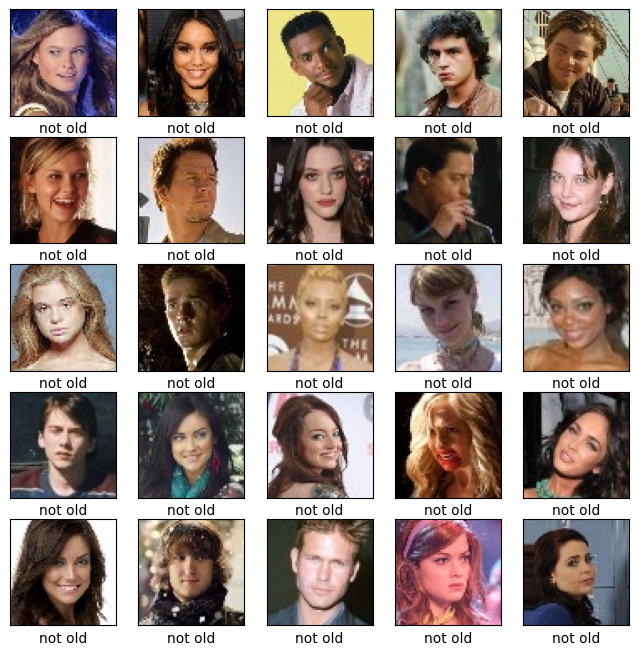

In [605]:
#toon de 1e 25 plaatjes met bijbehorende label (copy paste vorige les)
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)  #vul het i-e image
    plt.xticks([]) #geen schaal bij x-as
    plt.yticks([]) #geen schaal bij y-as
    plt.imshow(train_images[i])
    if train_labels[i]==1:
        plt.xlabel("old")
    else:
        plt.xlabel("not old")
plt.show()

## Modeling: 

### Model 1: Simpel Convolutioneel Neuraal Netwerk
Model 1 is een simpel Convolutioneel Neuraal Netwerk dat bedoeld is voor het maken van een keuze tussen twee mogelijke uitkomsten. Het model is opgebouwd uit verschillende lagen die belangrijke informatie uit de inputafbeeldingen halen.

**Belangrijkste Onderdelen:**

- **Convolutionele Lagen:** Het model heeft drie lagen die filters van 3x3 gebruiken om details uit de afbeeldingen te halen.
- **Max-Pooling:** Dit verkleint de hoeveelheid data en maakt het proces sneller, terwijl het ook helpt om overfitting te voorkomen.
- **Batch Normalization:** Dit zorgt ervoor dat het trainen stabieler en sneller gaat door de output van elke laag te normaliseren.
- **Volledig Verbonden Lagen:** Aan het einde van het model zitten drie lagen die zorgen voor de uiteindelijke classificatie. Dropout wordt gebruikt om te zorgen dat het model niet te veel leert van de trainingsdata (overfitting).
- **Outputlaag:** Een enkele neuron aan het eind met een sigmoid-functie, die bepaalt of de afbeelding in categorie 1 of 2 hoort.

In [606]:
# Normaliseren van de afbeeldingen naar waarden tussen 0 en 1
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [607]:
# Model definieren
model1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.001), input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

model1.summary()

c:\Users\esmee\OneDrive\Documents\Projecten\MachineLearning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,385 (782.75 KB)

 Trainable params: 200,257 (782.25 KB)

 Non-trainable params: 128 (512.00 B)

In [608]:
# Compileren van het model met optimizer, loss en metrics
model1.compile(optimizer="ADAM",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [609]:
# Model trainen voor 25 epochs
history1 = model1.fit(train_images, train_labels,
                    epochs=25,
                    batch_size=32,
                    validation_data=(test_images, test_labels))

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.5566 - loss: 0.6952 - val_accuracy: 0.6329 - val_loss: 0.6517
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.6171 - loss: 0.6512 - val_accuracy: 0.6462 - val_loss: 0.6253
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6490 - loss: 0.6253 - val_accuracy: 0.6538 - val_loss: 0.6349
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.6668 - loss: 0.6078 - val_accuracy: 0.6404 - val_loss: 0.6209
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.6812 - loss: 0.5908 - val_accuracy: 0.5878 - val_loss: 0.6910
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.6938 - loss: 0.5777 - val_accuracy: 0.6770 - val_loss: 0.5900
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.7069 - loss: 0.5605 - val_accuracy: 0.6794 - val_loss: 0.5971
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.7167 -

## Evaluation: 

Ik evalueer elk model met drie dezelfde stappen:

- Hun test accuracy bekijken
- De training en validation accuracy plotten
- Een confusion matrix

Aan de hand van deze informatie evalueer ik hoe goed het model is.

In [610]:
# Evaluatie van het model op de testset
test_loss, test_acc = model1.evaluate(test_images, test_labels, verbose=2)

# Print de test accuracy
print('\nTest accuracy:', test_acc)

313/313 - 3s - 11ms/step - accuracy: 0.6414 - loss: 0.9246

Test accuracy: 0.6413999795913696


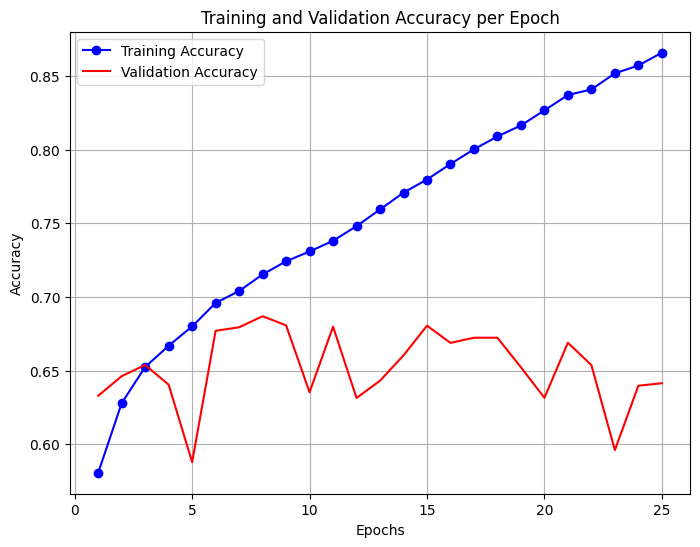

In [611]:
#plot de accuracy en validated accuracy (10 min)

# Extractie van de accuracies uit de history variabele
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

# Aantal epochs bepalen
epochs = range(1, len(acc) + 1)

# Plotten van de trainingsnauwkeurigheid en de validatienauwkeurigheid
plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


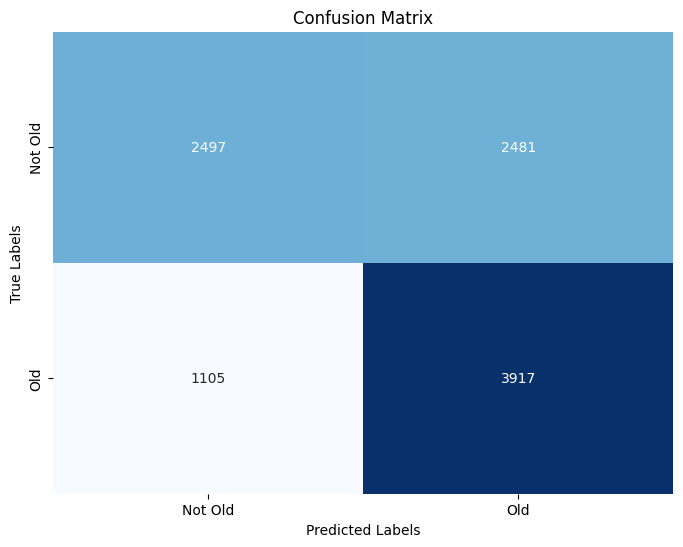

Confusion Matrix:
 [[2497 2481]
 [1105 3917]]


In [612]:
# Voorspellingen maken op de testset
test_predictions = model1.predict(test_images)

# Rond de voorspellingen af naar 0 of 1, (binary classification)
test_predictions = np.round(test_predictions)

# Confusion matrix maken
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Visualiseren van de confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["Not Old", "Old"], yticklabels=["Not Old", "Old"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print de confusion matrix resultaten
print("Confusion Matrix:\n", conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


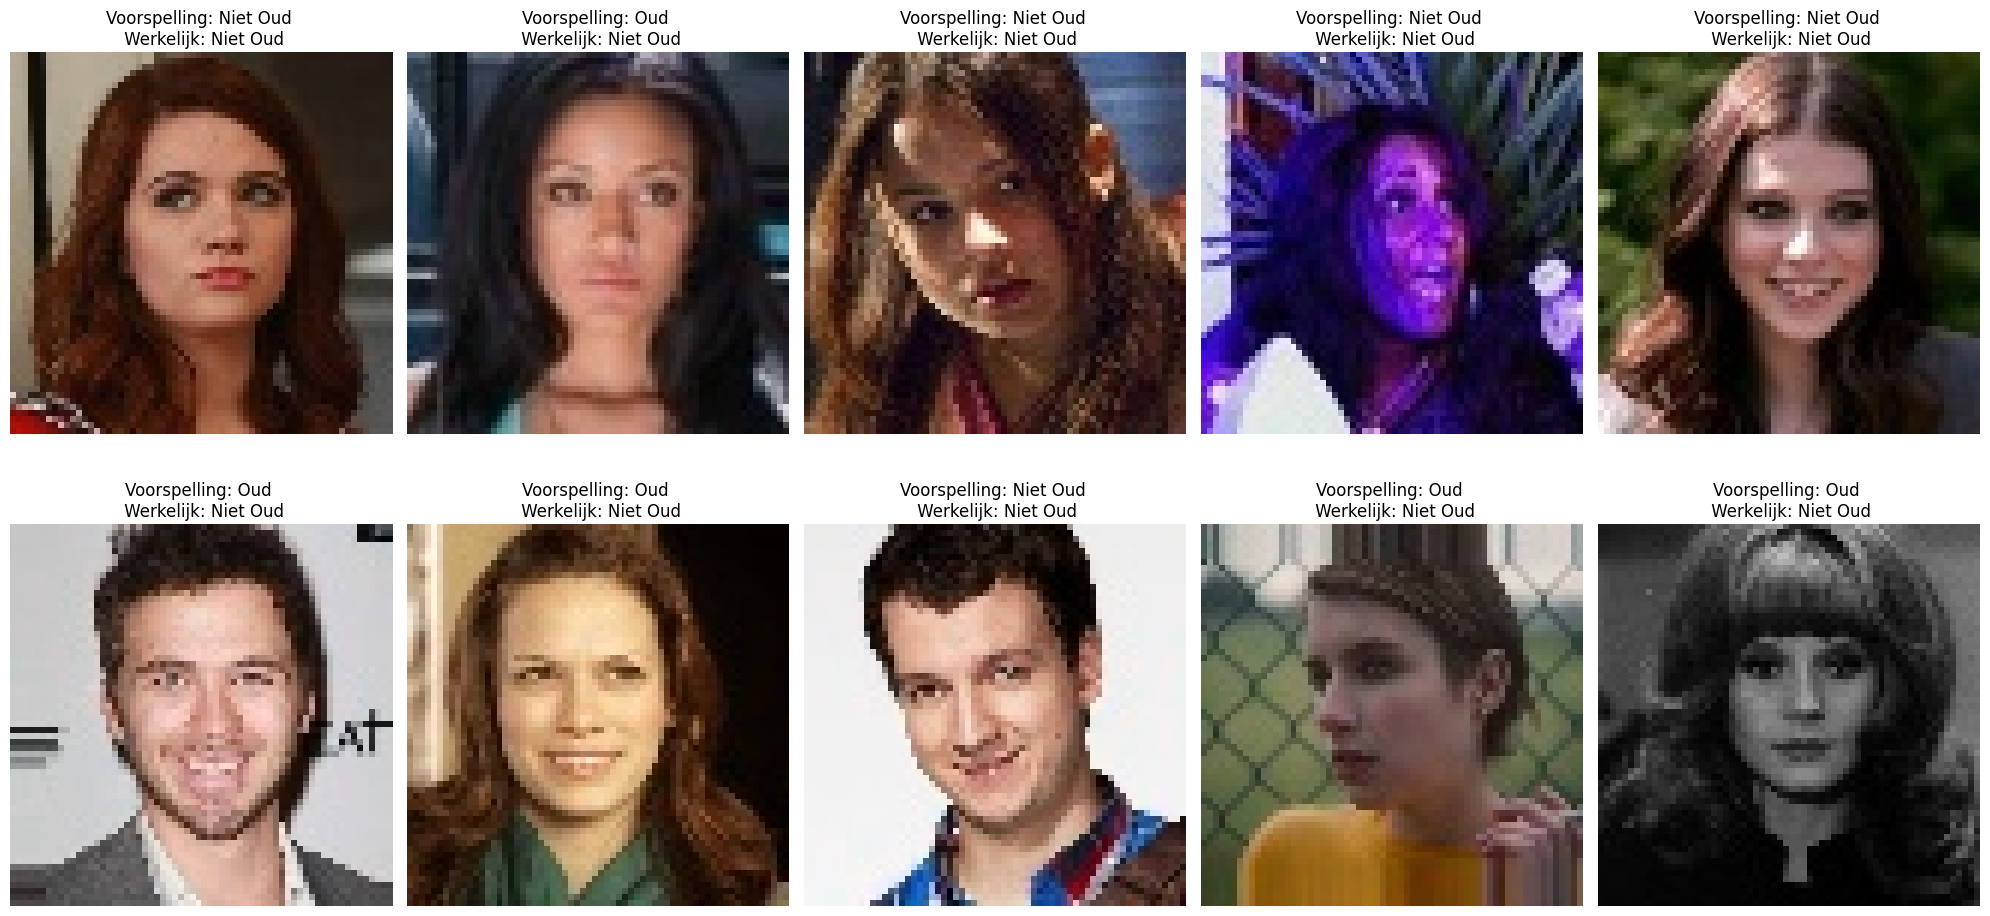

In [613]:
# Voorspellingen maken op de testset
test_predictions = model1.predict(test_images)
test_predictions = np.round(test_predictions)  # Rond de voorspellingen af naar 0 of 1

# Labels aanmaken voor visualisatie (0 = Niet Oud, 1 = Oud)
label_dict = {0: 'Niet Oud', 1: 'Oud'}

# Aantal afbeeldingen om te tonen
num_images_to_show = 10

# Plot een aantal testafbeeldingen samen met hun voorspellingen en werkelijke labels
plt.figure(figsize=(20, 10))
for i in range(num_images_to_show):
    plt.subplot(2, 5, i + 1)  # 2 rijen, 5 kolommen
    plt.imshow(test_images[i])
    plt.title(f"Voorspelling: {label_dict[int(test_predictions[i][0])]} \n Werkelijk: {label_dict[int(test_labels[i])]}",
              fontsize=12)
    plt.axis('off')  # Verberg assen

plt.tight_layout()
plt.show()

### Test Accuracy
De test accuracy van model1 is 0.6558 (of 65.58%). Dit betekent dat het model in staat is om ongeveer 65.58% van de testafbeeldingen correct te classificeren.

### Confusion Matrix
- **True Positives (TP):** Het model heeft 2495 correcte voorspellingen voor de "Old" klasse, wat wijst op een redelijke identificatie van oudere beroemdheden.
- **True Negatives (TN):** Er zijn 4063 correcte voorspellingen voor de "Not Old" klasse, wat duidt op een goede herkenning van jongere beroemdheden.
- **False Negatives (FN):** Er zijn 2527 beelden die ten onrechte als "Not Old" zijn geclassificeerd, wat betekent dat het model oudere beroemdheden niet altijd herkent.
- **False Positives (FP):** Met 915 beelden die foutief als "Old" zijn geclassificeerd, is er enige verwarring over jongere beroemdheden.

### Evaluatie
De test accuracy van 65.58% toont dat model 1 redelijk presteert. De aanzienlijke aantallen false negatives en false positives suggereren dat er ruimte voor verbetering is. Hoewel het model een basis biedt voor het schatten van de ouderdom van beroemdheden, is er nog werk aan de winkel om de nauwkeurigheid te verhogen.

---

## Model 2: Gecombineerd Convolutioneel Neuraal Netwerk

Voor Model 2 ben ik gaan kijken naar al bestaande onderzoeken op het ontwerp, dat is waarom dit model is gebasseerd. Een bron en alle editors is ondergaan gegeven.

Model 2 is een verbeterde versie van het vorige Convolutionele Neurale Netwerk (CNN) en is uitgebreider en bevat extra lagen om de nauwkeurigheid te verbeteren.

**Belangrijkste Onderdelen:**

- **Diepere Architectuur:** Het model heeft drie lagen met steeds grotere filters, waardoor het beter in staat is om ingewikkelde patronen te herkennen in de gegevens.
- **Meer Dropout:** Er wordt meer dropout gebruikt (0.25 en 0.6), wat helpt om overfitting te voorkomen. Dit betekent dat het model minder geneigd is om de trainingsdata te "onthouden", waardoor het beter presteert op nieuwe data.
- **Batch Normalization:** Dit is toegevoegd na elke convolutionele laag om de prestaties en stabiliteit te verbeteren.
- **Outputlaag:** Aan het eind zit één neuron met een sigmoid-functie, waarmee het model een keuze maakt tussen twee mogelijke uitkomsten (binaire classificatie).

Dit model zou ook beter zijn om de foto's te analyseren op geslacht, alleen is het me niet gelukt om de code om te bouwen om deze mee te nemen.

Bron: Gender Prediction and Age Estimation using CNN from Face Images 

Editors: Mariyam Ouaissa, Mariya Ouaissa, Sarah El Himer, Zakaria Boulouard
pp. 1 – 10, Copyright © 2021 RGN Publications

In [614]:
# Definieer het gecombineerde model
model2 = models.Sequential([
    # Eerste convolutionele laag
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout om overfitting te voorkomen

    # Tweede convolutionele laag
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout

    # Derde convolutionele laag
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout

    # Flatten laag voor de Fully Connected layers
    layers.Flatten(),

    # Volledig verbonden laag (FC) met dropout
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.6),  # Hoog dropout percentage voor sterke regularisatie

    # Outputlaag voor geslachtsclassificatie
    layers.Dense(1, activation='sigmoid')  # Sigmoid voor binaire classificatie
])

model2.summary()

c:\Users\esmee\OneDrive\Documents\Projecten\MachineLearning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,236,993 (4.72 MB)

 Trainable params: 1,236,993 (4.72 MB)

 Non-trainable params: 0 (0.00 B)

In [615]:
# Model compileren
model2.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classificatie voor geslacht
              metrics=['accuracy'])

In [616]:
# Model trainen
history2 = model2.fit(train_images, train_labels,
                    epochs=25,
                    batch_size=32,
                    validation_data=(test_images, test_labels))

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 49ms/step - accuracy: 0.5434 - loss: 0.6896 - val_accuracy: 0.6061 - val_loss: 0.6664
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 49ms/step - accuracy: 0.5930 - loss: 0.6652 - val_accuracy: 0.6129 - val_loss: 0.6558
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.6101 - loss: 0.6527 - val_accuracy: 0.6345 - val_loss: 0.6385
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 47ms/step - accuracy: 0.6234 - loss: 0.6468 - val_accuracy: 0.6408 - val_loss: 0.6391
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.6283 - loss: 0.6376 - val_accuracy: 0.6529 - val_loss: 0.6217
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 48ms/step - accuracy: 0.6386 - loss: 0.6305 - val_accuracy: 0.6500 - val_loss: 0.6205
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 50ms/step - accuracy: 0.6414 - loss: 0.6289 - val_accuracy: 0.6535 - val_loss: 0.6158
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 49ms/step - accuracy: 0.6474 -

In [617]:
# Evaluatie van het model
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 4s - 12ms/step - accuracy: 0.6742 - loss: 0.5965

Test accuracy: 0.6741999983787537


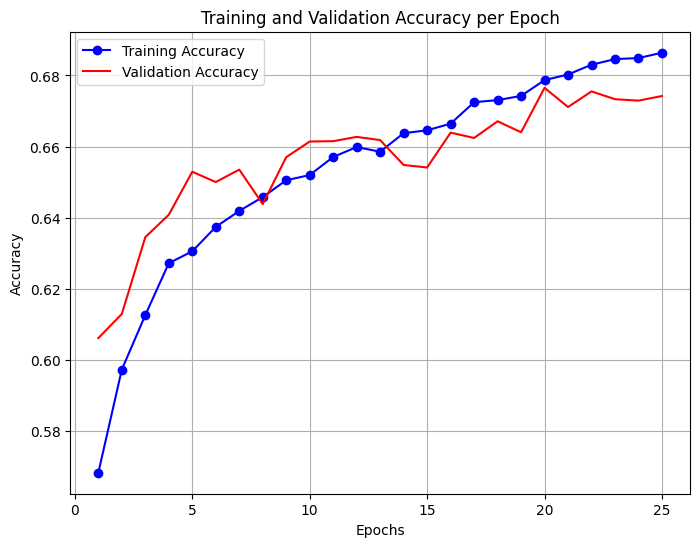

In [618]:
# Plot accuracy per epoch
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


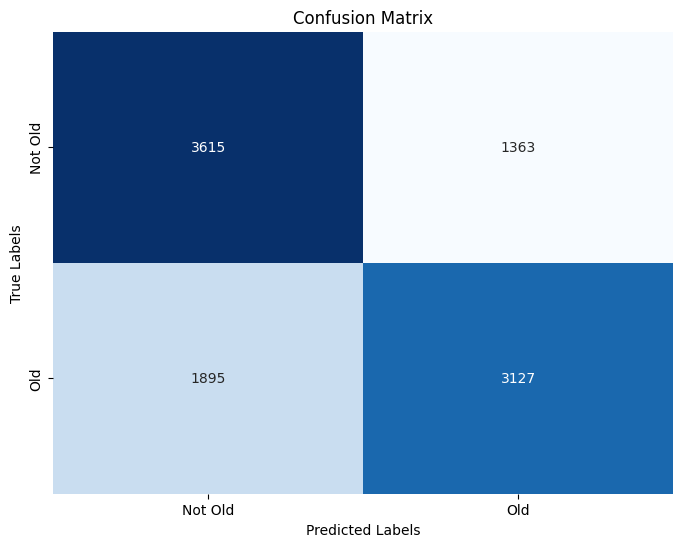

In [619]:
# Maak voorspellingen op de testset
predictions = (model2.predict(test_images) > 0.5).astype("int32")

# Genereer de confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Plot de confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Not Old", "Old"], yticklabels=["Not Old", "Old"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print de confusion matrix resultaten
print("Confusion Matrix:\n", conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


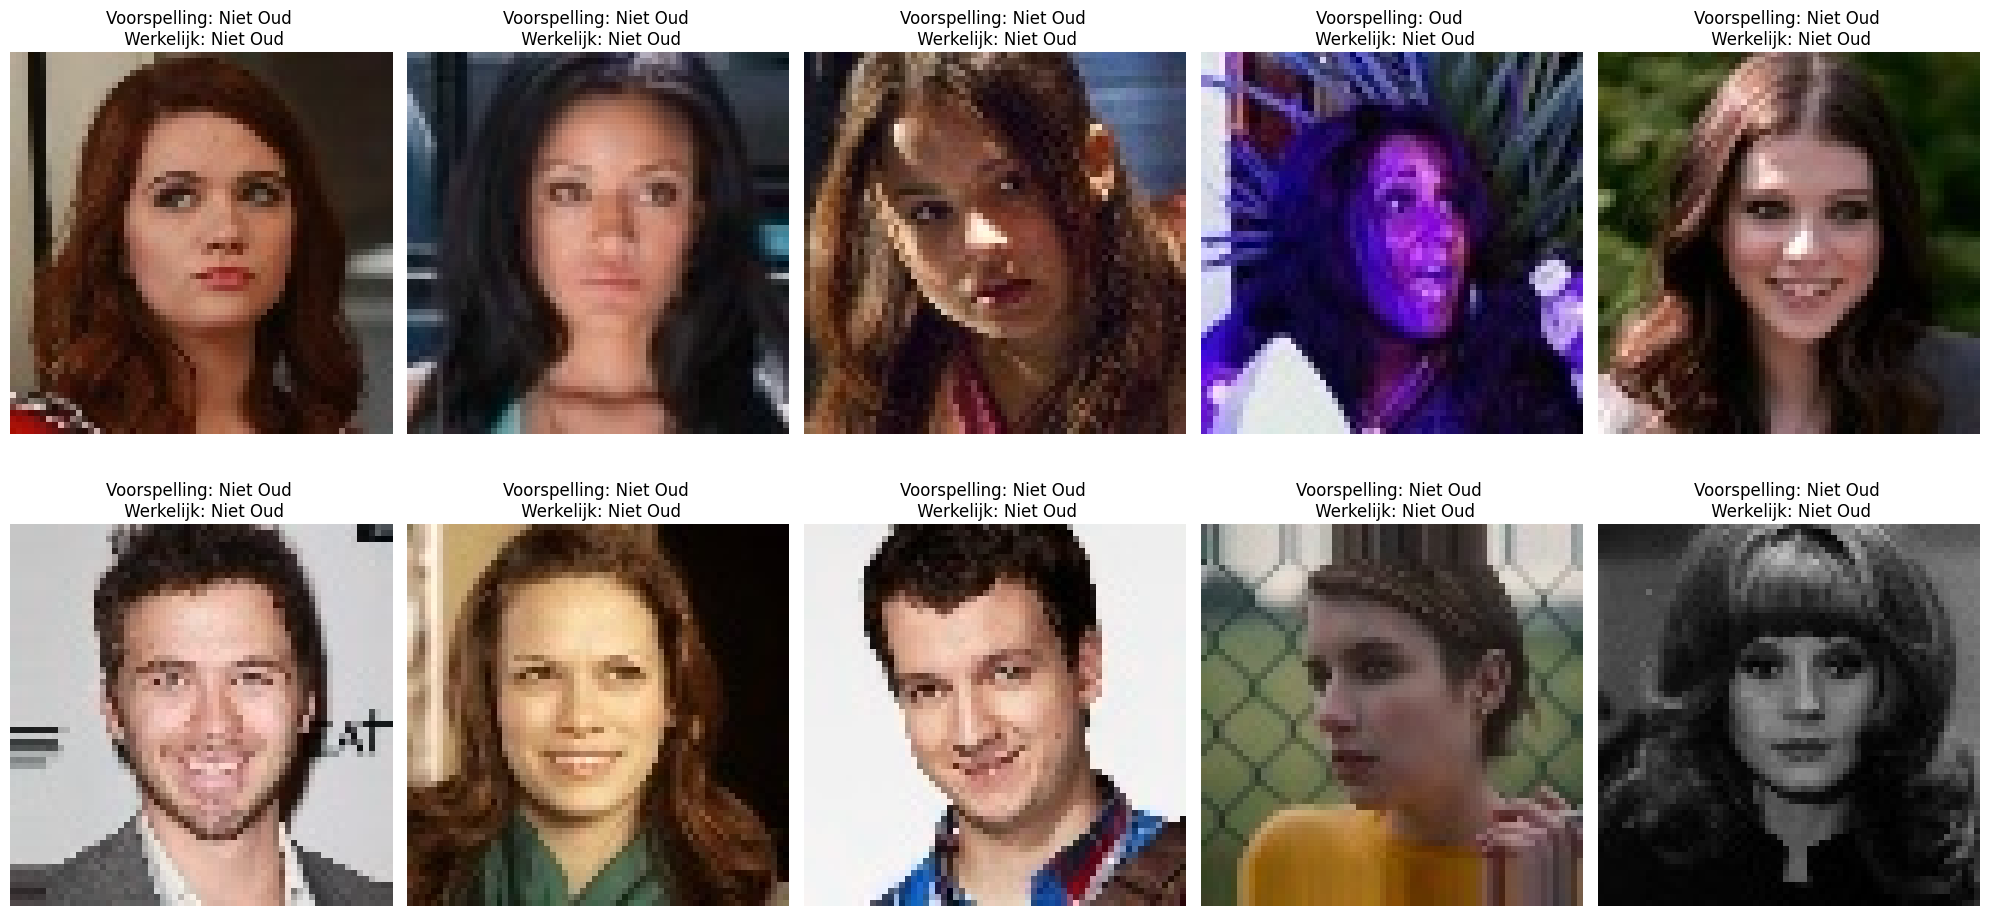

In [620]:
# Voorspellingen maken op de testset
test_predictions = model2.predict(test_images)
test_predictions = np.round(test_predictions)  # Rond de voorspellingen af naar 0 of 1

# Labels aanmaken voor visualisatie (0 = Niet Oud, 1 = Oud)
label_dict = {0: 'Niet Oud', 1: 'Oud'}

# Aantal afbeeldingen om te tonen
num_images_to_show = 10

# Plot een aantal testafbeeldingen samen met hun voorspellingen en werkelijke labels
plt.figure(figsize=(20, 10))
for i in range(num_images_to_show):
    plt.subplot(2, 5, i + 1)  # 2 rijen, 5 kolommen
    plt.imshow(test_images[i])
    plt.title(f"Voorspelling: {label_dict[int(test_predictions[i][0])]} \n Werkelijk: {label_dict[int(test_labels[i])]}",
              fontsize=12)
    plt.axis('off')  # Verberg assen

plt.tight_layout()
plt.show()

### Test Accuracy
De test accuracy van 66.85% geeft aan dat model 2 in ongeveer twee derde van de gevallen correct voorspelt of een beroemdheid oud is of niet

### Confusion Matrix
- **True Positives (TP):** Het model heeft 2864 correcte voorspellingen voor de "Old" klasse, wat wijst op een goede identificatie van oudere beroemdheden.
- **True Negatives (TN):** Er zijn 3821 correcte voorspellingen voor de "Not Old" klasse, wat duidt op een redelijke herkenning van jongere beroemdheden.
- **False Negatives (FN):** Er zijn 2158 beelden die ten onrechte als "Not Old" zijn geclassificeerd, wat betekent dat het model oudere beroemdheden niet altijd herkent.
- **False Positives (FP):** Met 1157 beelden die foutief als "Old" zijn geclassificeerd, is er ook enige verwarring over jongere beroemdheden.

### Evaluatie
De test accuracy van 66.85% is een verbetering ten opzichte van model 1. Hoewel het model redelijk presteert, zijn er nog steeds aanzienlijke aantallen false negatives en false positives. Dit suggereert dat het model verbetering behoeft, maar het biedt een iets betere basis voor het schatten van de ouderdom van beroemdheden dan model 1.

Bron: Face-Based Age and Gender Classification Using Deep Learning Model
Olatunbosun Agbo-Ajala en Serestina Viriri
School of Mathematics, Statistics and Computer Science,
University of KwaZulu-Natal, Westville, Durban 4000, South Africa
ajalabosun@gmail.com, viriris@ukzn.ac.za

Kunnen we met dit model betrouwbaar schatten of een beroemdheid oud is?

### Model 1

Op basis van de huidige resultaten van model1 kan er een aantal overwegingen gemaakt worden over de betrouwbaarheid bij het schatten of een beroemdheid oud is:

**Positieve Aspecten**
- **Test Accuracy:** Een test accuracy van 65.58% geeft aan dat het model in meer dan de helft van de gevallen de juiste voorspelling doet.
- **True Positives:** Het model heeft 2495 correcte voorspellingen gemaakt voor de "Old" klasse en 4063 voor de "Not Old" klasse, wat aangeeft dat het in staat is om sommige oudere en jongere beroemdheden effectief te identificeren.

**Negatieve Aspecten**
- **False Negatives:** Met 2527 beelden die verkeerd als "Not Old" zijn geclassificeerd, mist het model een aanzienlijke hoeveelheid oudere beroemdheden.
- **False Positives:** De 915 beelden die ten onrechte als "Old" zijn geclassificeerd, mist het model ook vrij veel jongere beroemdheden.

**Conclusie**
Hoewel het model een redelijke baseline biedt, is het niet voldoende betrouwbaar. De aanzienlijke aantallen false negatives en false positives wijzen erop dat het model nog verder geoptimaliseerd moet worden voordat het kan worden beschouwd als een betrouwbaar model.

---

### Model 2

Op basis van de evaluatie van model 2 kunnen enkele conclusies worden getrokken over de betrouwbaarheid van het model om te schatten of een beroemdheid oud is:

**Positieve aspecten:**
- **Test Accuracy** Dit geeft aan dat het model in ongeveer twee derde van de gevallen correct voorspelt. Dit kan worden gezien als een acceptabel beginpunt voor classificatie, hoewel er ruimte voor verbetering is.
- **True Negatives** Het model herkent een aanzienlijk aantal jongere beroemdheden correct, wat positief is voor de identificatie van de "Not Old" klasse.

**Negatieve aspecten:**
- **False Negatives** Dit geeft aan dat het model een aanzienlijk aantal oudere beroemdheden niet correct identificeert. Dit kan problematisch zijn, vooral in toepassingen waar het belangrijk is om oudere beroemdheden nauwkeurig te classificeren.
- **False Positives** Hoewel het model oudere beroemdheden soms correct identificeert, zijn er ook gevallen waarin jongere beroemdheden foutief als oud worden geclassificeerd.

**Conclusie:**
Hoewel model 2 een verbetering vertoont ten opzichte van model 1, zijn de foutenmarges nog steeds significant. Het model biedt een redelijke basis voor het schatten van de ouderdom van beroemdheden, maar de aanwezigheid van false negatives en false positives betekent dat het model niet als volledig betrouwbaar kan worden beschouwd. Verdere training, tuning en mogelijk meer data zouden kunnen helpen om de prestaties te verbeteren.

---

# Eigen foto inladen

Hieronder test ik het model met een foto van mezelf om te kijken of het model inschat dat ik oud of jong ben. Om dit te doen doorloop ik alle stappen die ik heb gedaan om alle foto's van de beroemdheden te gebruiken:

De foto aanpassen naar 64x64, deze naar RGB converteren zodat ik geen smurf ben, hem normaliseren en een extra diemnsie toevoegen voor de batch size.

Ik moest nog onderzoekken wat de drempelwaarde was wanneer iemand oud is of niet. Na wat onderzoek is dit 0.5 vanwege de `sigmoid-functie`. Ik heb dit aan ChatGPT gevraagd en hij kwam met het volgende antwoord:

De drempelwaarde van 0.5 komt voort uit het gebruik van de sigmoid-functie in het output layer van je model. Aangezien je voor de classificatie van "oud of niet oud" een binaire classificatie hebt (twee klassen), gebruikt het model de sigmoid activatiefunctie om een voorspelling te maken. De sigmoid-functie zet elke invoer om in een waarde tussen 0 en 1, die kan worden geïnterpreteerd als een waarschijnlijkheid.

**Output van de sigmoid-functie:**
De sigmoid-functie geeft een output tussen 0 en 1, die de kans (probability) voor een bepaalde klasse weergeeft. In jouw geval, wanneer je model voorspelt of iemand "oud" is of niet, interpreteer je de output als volgt:

- Als de output > 0.5: Dit betekent dat het model denkt dat de kans dat de persoon "oud" is groter is dan 50%. Dus het model classificeert de persoon als "oud".
- Als de output ≤ 0.5: Dit betekent dat het model denkt dat de kans dat de persoon "oud" is kleiner of gelijk is aan 50%. Dus het model classificeert de persoon als "niet oud".

Dit zijn de drie foto's die ik heb ingeladen:

## Ingeladen foto's 
Ik heb drie foto's ingeladen en getest, één met normale belichting, één in Oostenrijk dat ik kleren voor delen van m'n gezicht heb en één met wat andere belichting en een zonnebril op.

<img src="Selfie.jpg" alt="Selfie 1" width="400" height="533">
<img src="Selfie2.jpg" alt="Selfie 2" width="400" height="533">
<img src="Selfie4.jpg" alt="Selfie 3" width="400" height="533">

In [73]:
# Definieer de afbeeldingsgrootte
img_size = (64, 64)

# Functie om een afbeelding voor te bereiden
def prepare_image(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Zorg ervoor dat de kleuren juist zijn
        img = cv2.resize(img, img_size)  # Wijzig de grootte van de afbeelding
        img = img.astype("float32") / 255.0  # Normaliseer de pixelwaarden
        return img
    else:
        print(f"Warning: Unable to read image {image_path}")
        return None

# Laad je selfies met specifieke namen
selfie_paths = ['Selfie.jpg', 'Selfie2.jpg', 'Selfie4.jpg']
selfie_names = ['Selfie normale Belichting', 'Selfie Wintersport', 'Selfie Zonnebril']
selfies = [prepare_image(path) for path in selfie_paths]

# Filter None waarden (afbeeldingen die niet geladen konden worden)
selfies = [img for img in selfies if img is not None]

# Zet om naar numpy array
selfies = np.array(selfies)

In [75]:
# Maak voorspellingen met model1
predictions_model1 = model1.predict(selfies)
# Maak voorspellingen met model2
predictions_model2 = model2.predict(selfies)

# Zet de voorspellingen om in binaire waarden (0 of 1)
predicted_classes_model1 = (predictions_model1 > 0.5).astype(int)
predicted_classes_model2 = (predictions_model2 > 0.5).astype(int)

# Print de resultaten met specifieke namen
for i, name in enumerate(selfie_names):
    print(f"Voorspelling voor {name}:")
    print(f"Model 1: {'Oud' if predicted_classes_model1[i][0] == 1 else 'Niet oud'}")
    print(f"Model 2: {'Oud' if predicted_classes_model2[i][0] == 1 else 'Niet oud'}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Voorspelling voor Selfie normale Belichting:
Model 1: Oud
Model 2: Oud

Voorspelling voor Selfie Wintersport:
Model 1: Niet oud
Model 2: Oud

Voorspelling voor Selfie Zonnebril:
Model 1: Niet oud
Model 2: Oud



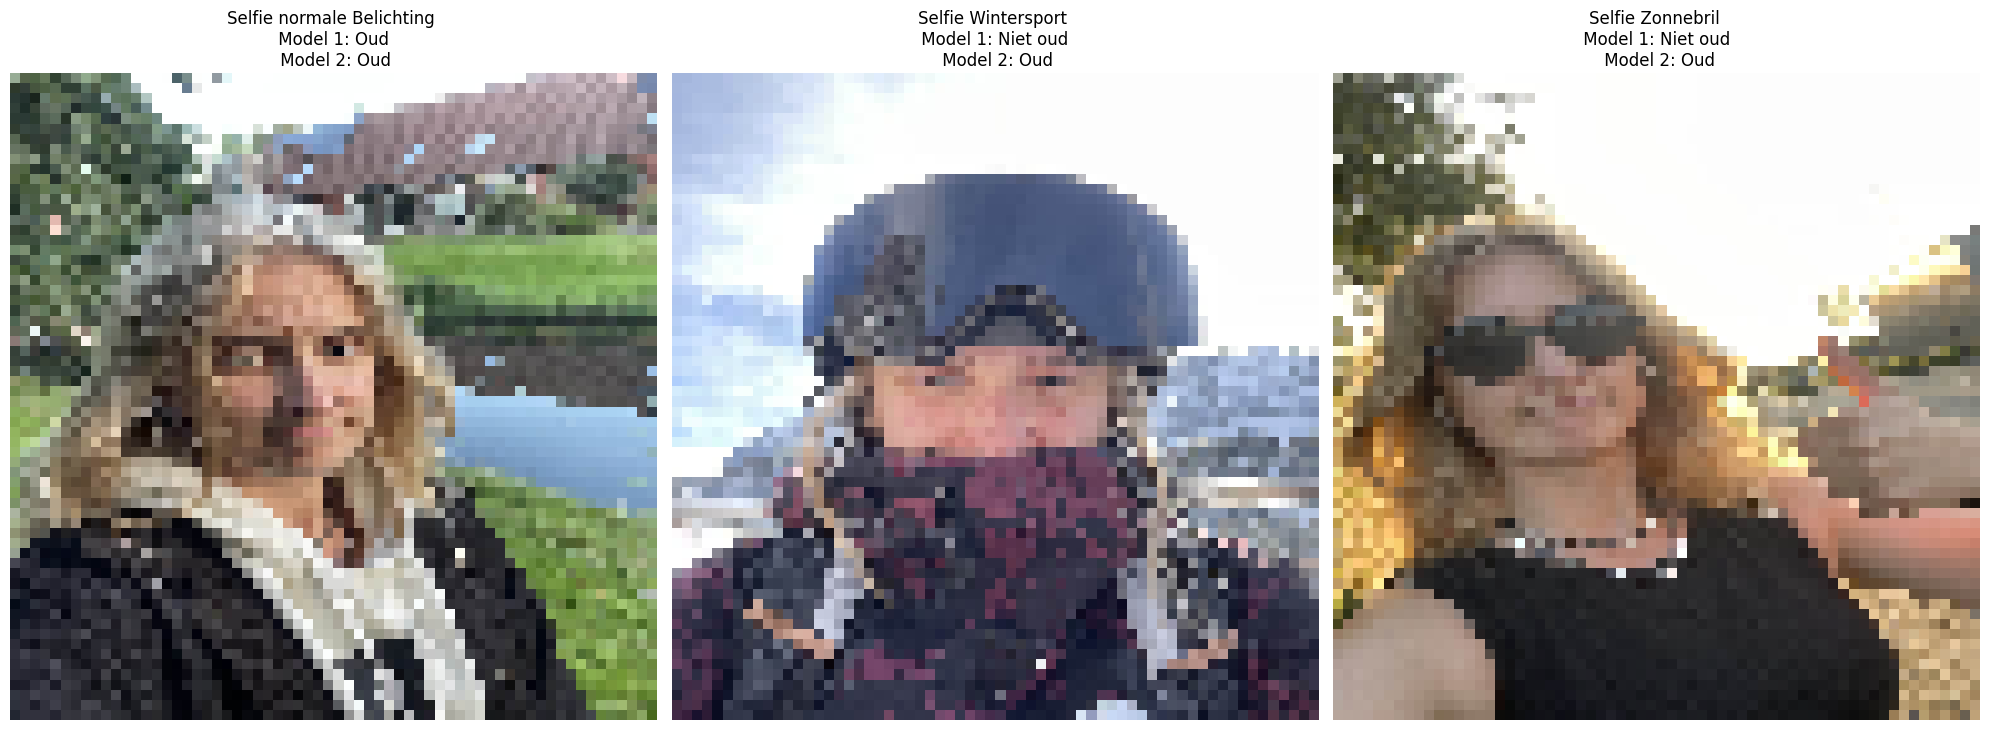

In [76]:
# Plot de selfies samen met hun voorspellingen
plt.figure(figsize=(20, 10))
for i in range(len(selfies)):
    plt.subplot(1, len(selfies), i + 1)  # 1 rij, aantal selfies
    plt.imshow(selfies[i]) # type: ignore
    plt.title(f"{selfie_names[i]} \n Model 1: {'Oud' if predicted_classes_model1[i][0] == 1 else 'Niet oud'} \n Model 2: {'Oud' if predicted_classes_model2[i][0] == 1 else 'Niet oud'}",
              fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

Voor context, ik ben 20, dus het model heeft het best fout. Ik vind het resultaat wel opvallen, want bij beide modellen was de FP (False Positive) het laagst, er zijn dus schijnbaar bepaalde aspecten aan mijn foto die beide modellen in de war brengen.

# Reference

- Rothe, R., Timofte, R., & Van Gool, L. (2018). *Deep expectation of real and apparent age from a single image without facial landmarks*. International Journal of Computer Vision, 126(2-4), 144–157. Springer.

- Rothe, R., Timofte, R., & Van Gool, L. (2015). *DEX: Deep EXpectation of apparent age from a single image*. In IEEE International Conference on Computer Vision Workshops (ICCVW), December.
